<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/04_pytorch_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[View Source Code](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/04_pytorch_custom_datasets.ipynb) | [View Slides](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/slides/04_pytorch_custom_datasets.pdf) | [Watch Video Walkthrough](https://youtu.be/Z_ikDlimN6A?t=71010)

In [1]:
import torch
import torchvision
from torch import nn


import torchvision.datasets as datasets
import torchvision.transforms as transforms

import pathlib
data_dir = pathlib.Path("data")

In [2]:
# Get training data
train_data = datasets.Food101(root=data_dir,
                              split="train",
                              # transform=transforms.ToTensor(),
                              download=True)

# Get testing data
test_data = datasets.Food101(root=data_dir,
                             split="test",
                             # transform=transforms.ToTensor(),
                             download=True)

100%|██████████| 4996278331/4996278331 [00:40<00:00, 123323458.99it/s]


Extracting data/food-101.tar.gz to data


In [3]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
train_data.classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [5]:
import random

# Setup data paths
data_path = data_dir / "food-101" / "images"
target_classes = train_data.classes

amount_to_get = 1

# Create function to separate a random amount of data
def get_subset(image_path=data_path,
               data_splits=["train", "test"],
               target_classes=train_data.classes,
               amount=1,
               seed=42):
    random.seed(42)
    label_splits = {}

    # Get labels
    for data_split in data_splits:
        print(f"[INFO] Creating image split for: {data_split}...")
        label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"
        with open(label_path, "r") as f:
            labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes]

        # Get random subset of target classes image ID's
        number_to_sample = round(amount * len(labels))
        print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}...")
        sampled_images = random.sample(labels, k=number_to_sample)

        # Apply full paths
        image_paths = [pathlib.Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
        label_splits[data_split] = image_paths
    return label_splits

label_splits = get_subset(amount=amount_to_get)
label_splits["train"][:10]

[INFO] Creating image split for: train...
[INFO] Getting random subset of 75750 images for train...
[INFO] Creating image split for: test...
[INFO] Getting random subset of 25250 images for test...


[PosixPath('data/food-101/images/chicken_quesadilla/2670687.jpg'),
 PosixPath('data/food-101/images/beef_tartare/2507172.jpg'),
 PosixPath('data/food-101/images/greek_salad/1260996.jpg'),
 PosixPath('data/food-101/images/french_toast/3917826.jpg'),
 PosixPath('data/food-101/images/foie_gras/1035427.jpg'),
 PosixPath('data/food-101/images/clam_chowder/2402986.jpg'),
 PosixPath('data/food-101/images/cheese_plate/75029.jpg'),
 PosixPath('data/food-101/images/sushi/2019344.jpg'),
 PosixPath('data/food-101/images/ceviche/1648055.jpg'),
 PosixPath('data/food-101/images/panna_cotta/357026.jpg')]

In [6]:
# Create target directory path
target_dir_name = "data/all_foods"
print(f"Creating directory: '{target_dir_name}'")

# Setup the directories
target_dir = pathlib.Path(target_dir_name)

# Make the directories
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: 'data/all_foods'


In [7]:
import shutil

for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

Streaming output truncated to the last 5000 lines.
[INFO] Copying data/food-101/images/steak/2814314.jpg to data/all_foods/test/steak/2814314.jpg...
[INFO] Copying data/food-101/images/cup_cakes/97713.jpg to data/all_foods/test/cup_cakes/97713.jpg...
[INFO] Copying data/food-101/images/churros/3417598.jpg to data/all_foods/test/churros/3417598.jpg...
[INFO] Copying data/food-101/images/cannoli/726340.jpg to data/all_foods/test/cannoli/726340.jpg...
[INFO] Copying data/food-101/images/pulled_pork_sandwich/625080.jpg to data/all_foods/test/pulled_pork_sandwich/625080.jpg...
[INFO] Copying data/food-101/images/frozen_yogurt/1987670.jpg to data/all_foods/test/frozen_yogurt/1987670.jpg...
[INFO] Copying data/food-101/images/beet_salad/2915561.jpg to data/all_foods/test/beet_salad/2915561.jpg...
[INFO] Copying data/food-101/images/beef_tartare/1839171.jpg to data/all_foods/test/beef_tartare/1839171.jpg...
[INFO] Copying data/food-101/images/donuts/700534.jpg to data/all_foods/test/donuts/700

In [8]:
import pathlib
from pathlib import Path


In [9]:
# Setup train and testing paths
data_path = Path("data/")
image_path = data_path / "all_foods"

train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/all_foods/train'), PosixPath('data/all_foods/test'))

Random image path: data/all_foods/train/ice_cream/2402784.jpg
Image class: ice_cream
Image height: 512
Image width: 512


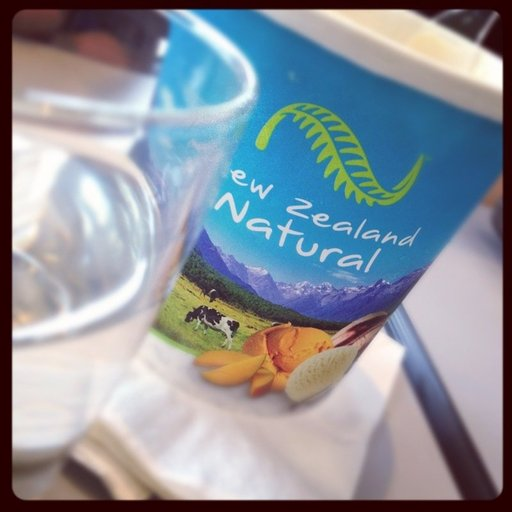

In [10]:
import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

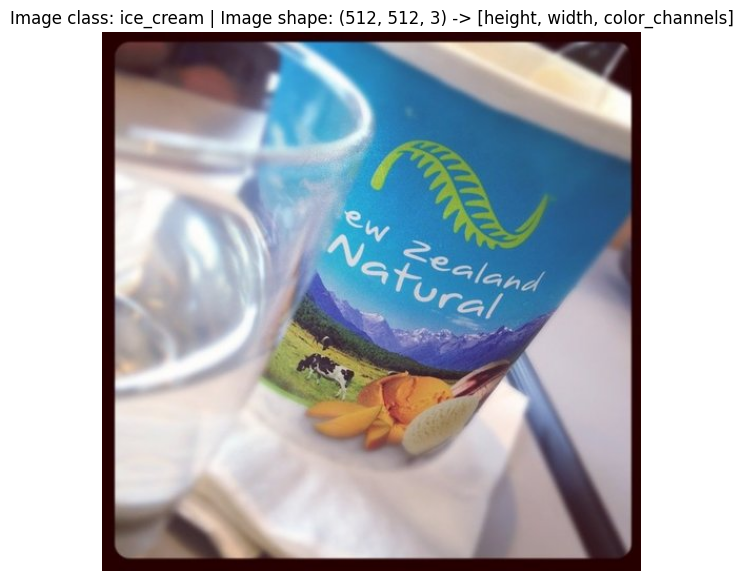

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [12]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [13]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

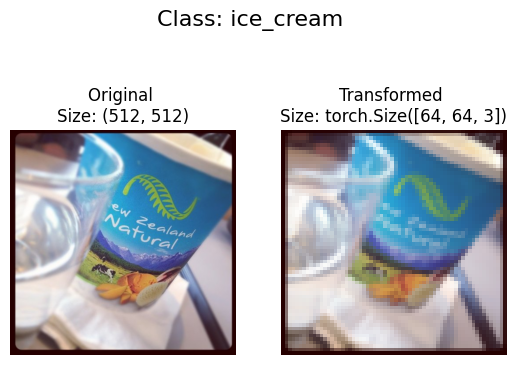

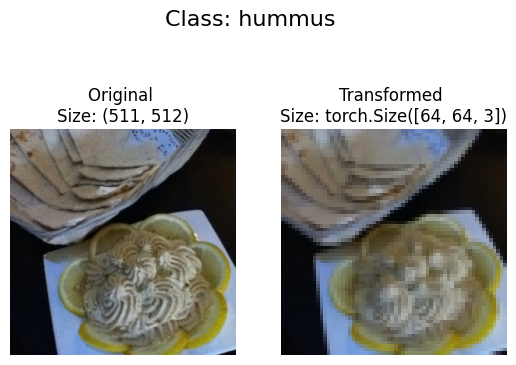

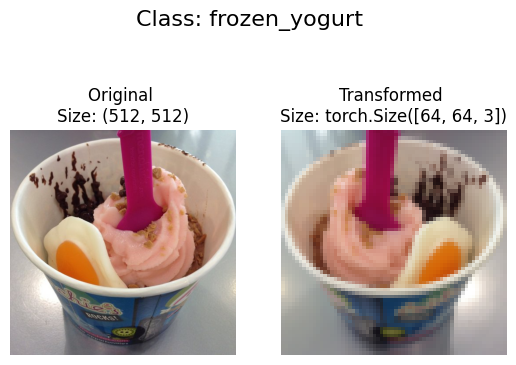

In [14]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")
            # img_as_array = np.asarray(f)

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

In [15]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 75750
    Root location: data/all_foods/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 25250
    Root location: data/all_foods/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [16]:
# Get class names as a list
class_names = train_data.classes
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [17]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'apple_pie': 0,
 'baby_back_ribs': 1,
 'baklava': 2,
 'beef_carpaccio': 3,
 'beef_tartare': 4,
 'beet_salad': 5,
 'beignets': 6,
 'bibimbap': 7,
 'bread_pudding': 8,
 'breakfast_burrito': 9,
 'bruschetta': 10,
 'caesar_salad': 11,
 'cannoli': 12,
 'caprese_salad': 13,
 'carrot_cake': 14,
 'ceviche': 15,
 'cheese_plate': 16,
 'cheesecake': 17,
 'chicken_curry': 18,
 'chicken_quesadilla': 19,
 'chicken_wings': 20,
 'chocolate_cake': 21,
 'chocolate_mousse': 22,
 'churros': 23,
 'clam_chowder': 24,
 'club_sandwich': 25,
 'crab_cakes': 26,
 'creme_brulee': 27,
 'croque_madame': 28,
 'cup_cakes': 29,
 'deviled_eggs': 30,
 'donuts': 31,
 'dumplings': 32,
 'edamame': 33,
 'eggs_benedict': 34,
 'escargots': 35,
 'falafel': 36,
 'filet_mignon': 37,
 'fish_and_chips': 38,
 'foie_gras': 39,
 'french_fries': 40,
 'french_onion_soup': 41,
 'french_toast': 42,
 'fried_calamari': 43,
 'fried_rice': 44,
 'frozen_yogurt': 45,
 'garlic_bread': 46,
 'gnocchi': 47,
 'greek_salad': 48,
 'grilled_cheese_sa

In [18]:
# Check the lengths
len(train_data), len(test_data)

(75750, 25250)

In [19]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1529, 0.1608, 0.1569,  ..., 0.2745, 0.2196, 0.1922],
         [0.1961, 0.2039, 0.2118,  ..., 0.3451, 0.2863, 0.2588],
         [0.2157, 0.2745, 0.2745,  ..., 0.4078, 0.4000, 0.3686],
         ...,
         [0.2078, 0.1922, 0.1843,  ..., 0.3176, 0.2902, 0.2824],
         [0.2000, 0.2039, 0.2078,  ..., 0.2235, 0.2471, 0.2039],
         [0.1765, 0.1765, 0.1882,  ..., 0.2078, 0.2510, 0.2275]],

        [[0.1608, 0.1647, 0.1608,  ..., 0.2510, 0.2196, 0.2078],
         [0.1843, 0.1922, 0.2078,  ..., 0.3098, 0.2431, 0.2078],
         [0.2118, 0.2588, 0.2667,  ..., 0.4039, 0.3804, 0.3373],
         ...,
         [0.1961, 0.1843, 0.1765,  ..., 0.2863, 0.2510, 0.2431],
         [0.1843, 0.1882, 0.1922,  ..., 0.2196, 0.2431, 0.2078],
         [0.1569, 0.1647, 0.1765,  ..., 0.2157, 0.2275, 0.2196]],

        [[0.1412, 0.1569, 0.1451,  ..., 0.2157, 0.2000, 0.1882],
         [0.1725, 0.1843, 0.2118,  ..., 0.2863, 0.2275, 0.1843],
         [0.2078, 0.2549, 0.2627,  ..., 0.38

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


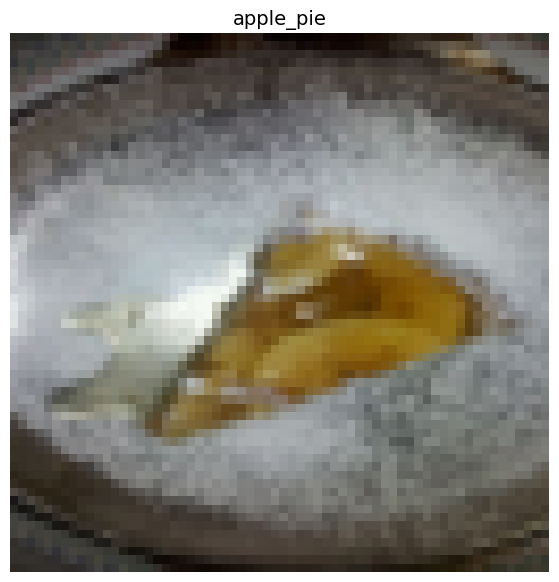

In [20]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

In [21]:
import os
print(f"Number of CPUs: {os.cpu_count()}")

Number of CPUs: 8


In [22]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE, # how many samples per batch?
                              num_workers=os.cpu_count(), # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7bfb6e473310>,
 <torch.utils.data.dataloader.DataLoader at 0x7bfb6e473a30>)

In [23]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


In [24]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [25]:
# import torchvision.datasets as datasets
# from datasets import

In [26]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [27]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

In [28]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense
    transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
])

# Don't need to perform augmentation on the test data
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

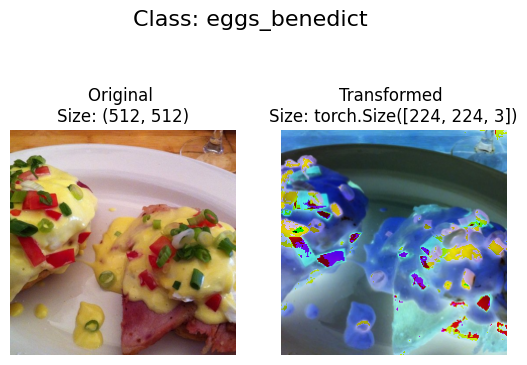

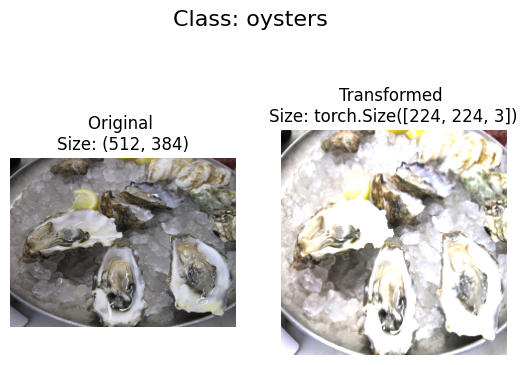

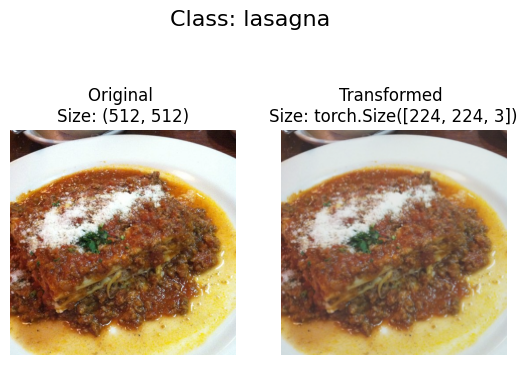

In [29]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

In [30]:
# Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense
    transforms.ToTensor(),
])

In [31]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 8 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7bfc54d23010>,
 <torch.utils.data.dataloader.DataLoader at 0x7bfb71658d90>)

In [32]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [33]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [34]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [35]:
# # Set random seeds
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)

# # Set number of epochs
# NUM_EPOCHS = 50

# # Recreate an instance of TinyVGG
# model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
#                   hidden_units=64,
#                   output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# # Start the timer
# from timeit import default_timer as timer
# start_time = timer()

# # Train model_0
# model_0_results = train(model=model_0,
#                         train_dataloader=train_dataloader_simple,
#                         test_dataloader=test_dataloader_simple,
#                         optimizer=optimizer,
#                         loss_fn=loss_fn,
#                         epochs=NUM_EPOCHS)

# # End the timer and print out how long it took
# end_time = timer()
# print(f"Total training time: {end_time-start_time:.3f} seconds")

# Use resnet

In [36]:
from torchvision import models

In [37]:
res_model = models.resnet18(pretrained=True)
for param in res_model.parameters():
    param.requires_grad = False

num_ftrs = res_model.fc.in_features
res_model.fc = nn.Linear(num_ftrs, 101)

res_model = res_model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 169MB/s]


In [38]:
# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(params=res_model.parameters(), lr=0.001)
# NUM_EPOCHS = 200
# res_model_results = train(model=res_model,
#                         train_dataloader=train_dataloader_simple,
#                         test_dataloader=test_dataloader_simple,
#                         optimizer=optimizer,
#                         loss_fn=loss_fn,
#                         epochs=NUM_EPOCHS)

pretrained=False:

Epoch: 16 | train_loss: 0.1713 | train_acc: 0.9461 | test_loss: 5.1074 | test_acc: 0.2920

Epoch: 17 | train_loss: 0.1581 | train_acc: 0.9486 | test_loss: 5.2396 | test_acc: 0.2939

Epoch: 18 | train_loss: 0.1490 | train_acc: 0.9527 | test_loss: 5.3396 | test_acc: 0.2908


pretrained=True:

Epoch: 48 | train_loss: 1.0464 | train_acc: 0.7357 | test_loss: 3.2357 | test_acc: 0.3748

Epoch: 49 | train_loss: 1.0363 | train_acc: 0.7361 | test_loss: 3.1380 | test_acc: 0.3845

Epoch: 50 | train_loss: 1.0079 | train_acc: 0.7430 | test_loss: 3.1016 | test_acc: 0.3904

In [39]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

In [40]:
# plot_loss_curves(model_0_results)

# Resnet

In [53]:
from __future__ import print_function, division

# basic libraries
import matplotlib.pyplot as plt
import time
import os
import copy
import pickle
from pathlib import Path
from typing import List
import torch.optim as optim
from torch.optim import lr_scheduler

In [42]:
MODEL_NAME = 'resnet18'
OPTIMIZER = 'ADAM' #'SGD', 'ADAM'
PRETRAIN = False
EPOCH_NUM = 300 # 300
BATCH_SIZE = 64
SCALE_FACTOR = 1

if(MODEL_NAME == 'resnet18'):
    RESCALE_SIZE = 256
    CROP_SIZE = 224

DATASET = 'all_foods/'
DATA_DIR = 'data/' + DATASET
CHECKPOINTS_DIR = './checkpoints/' + DATASET

MODEL_PREFIX = CHECKPOINTS_DIR + MODEL_NAME

BEST_MODEL_PATH = MODEL_PREFIX + '_model_best.pth'
LAST_MODEL_PATH = MODEL_PREFIX + '_model_last.pth'
LOSS_PATH       = MODEL_PREFIX + '_loss.txt'
ACCURACY_PATH   = MODEL_PREFIX + '_accuracy.txt'

Path('data').mkdir(parents=True, exist_ok=True)
Path(DATA_DIR).mkdir(parents=True, exist_ok=True)
Path('checkpoints').mkdir(parents=True, exist_ok=True)
Path(CHECKPOINTS_DIR).mkdir(parents=True, exist_ok=True)

print(BEST_MODEL_PATH)
print(LAST_MODEL_PATH)

./checkpoints/all_foods/resnet18_model_best.pth
./checkpoints/all_foods/resnet18_model_last.pth


In [43]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(CROP_SIZE),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(RESCALE_SIZE),
        transforms.CenterCrop(CROP_SIZE),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = DATA_DIR
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=BATCH_SIZE, shuffle=True, num_workers=4) for x in ['train', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}

class_names = image_datasets['train'].classes
class_num = len(class_names)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(class_names)
print(class_num)
print(device)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

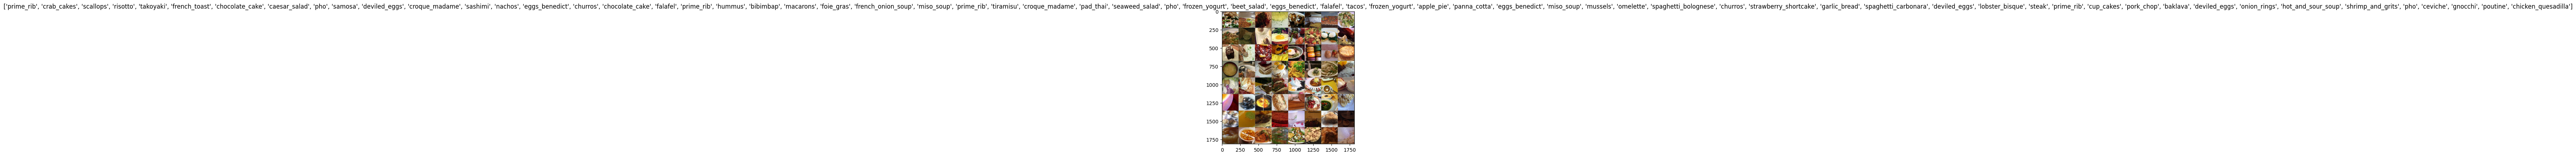

In [44]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [45]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

In [46]:
from tqdm.auto import tqdm

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):

    since = time.time()

    #best_epoch = 0
    #best_acc = 0.0
    #best_model_wts = copy.deepcopy(model.state_dict())

    loss_values = {'train': [], 'val': []}
    acc_values = {'train': [], 'val': []}
    lr_values = {'train': [], 'val': []}

    for epoch in tqdm(range(num_epochs)):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        #for phase in ['train', 'val']:
        for phase in ['train']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data).cpu().detach().numpy()
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            loss_values[phase].append(epoch_loss)
            acc_values[phase].append(epoch_acc)
            if phase == 'train':
                lr_values[phase].append(get_lr(optimizer))

            # deep copy the model
            #if phase == 'val' and epoch_acc > best_acc:
                #best_epoch = epoch
                #best_acc = epoch_acc
                #best_model_wts = copy.deepcopy(model.state_dict())

        print()

    last_model_wts = copy.deepcopy(model.state_dict())
    last_acc = epoch_acc

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    #print('Best val Acc: {:4f} at {}'.format(best_acc, best_epoch))
    #print('Last val Acc: {:4f}'.format(last_acc))

    # load best model weights
    #model.load_state_dict(best_model_wts)
    loss_values['val'] = 0
    acc_values['val'] = 0
    lr_values['val'] = 0

    #return best_model_wts, last_model_wts, loss_values, acc_values, lr_values
    return last_model_wts, loss_values, acc_values, lr_values

In [47]:
model = models.resnet18(pretrained=PRETRAIN)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, class_num)

model = model.to(device)
criterion = nn.CrossEntropyLoss()

if(OPTIMIZER == 'SGD'):
    # Observe that all parameters are being optimized
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    # Decay LR by a factor of 0.1 every 7 epochs
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
elif(OPTIMIZER == 'ADAM'):
    # not yet optimized
    optimizer = optim.Adam(model.parameters(), lr=0.001) #Adam
    exp_lr_scheduler = lr_scheduler.ExponentialLR(optimizer, 0.99) #Adam
    #exp_lr_scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda epoch: 1/(epoch+1)) #Adam

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


# Model Summary

In [48]:
from torchsummary import summary
# import torchsummaryX

In [49]:
input = torch.rand((1, 3, CROP_SIZE, CROP_SIZE)).to(device)
summary(model, (3, CROP_SIZE, CROP_SIZE))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

# Train

In [68]:
import time


In [71]:
EPOCH_NUM = 1

In [72]:
last_model_wts, loss_values, acc_values, lr_values = train_model(model, criterion, optimizer, exp_lr_scheduler, num_epochs=EPOCH_NUM)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 0/0
----------
train Loss: 1.2446 Acc: 0.6742

Training complete in 1m 46s


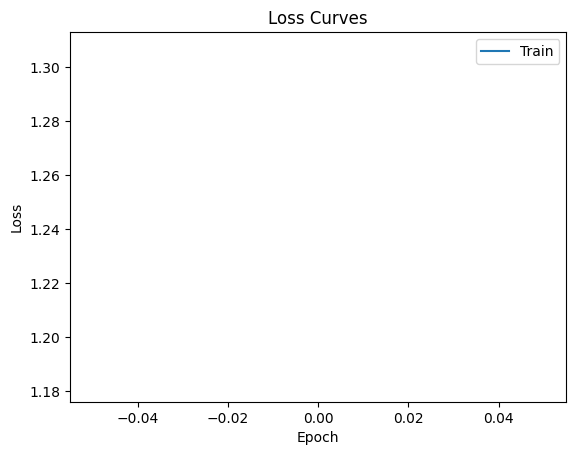

In [73]:
# store the loss values
with open(LOSS_PATH, "wb") as fp:   #Pickling
    pickle.dump(loss_values, fp)

# plot
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(loss_values['train'], label = "Train")
#plt.plot(loss_values['val'], label = "val")
plt.legend()
plt.show()

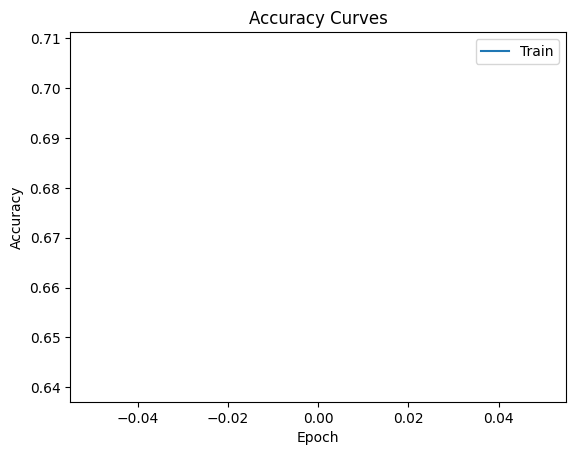

In [74]:
# store the accuracy values
with open(ACCURACY_PATH, "wb") as fp:   #Pickling
    pickle.dump(acc_values, fp)

# plot
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(acc_values['train'], label = "Train")
#plt.plot(acc_values['val'], label = "val")
plt.legend()
plt.show()

In [75]:
last_model = models.resnet18(pretrained=PRETRAIN)
num_ftrs = last_model.fc.in_features
last_model.fc = nn.Linear(num_ftrs, class_num)
last_model.load_state_dict(last_model_wts)
torch.save(last_model, LAST_MODEL_PATH)

# load model

In [76]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = torch.load(LAST_MODEL_PATH)
model.to(device)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

[GT]   class index: 68, class name: onion_rings
[Pred] class index: 100, class name: waffles


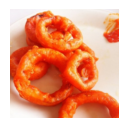

[GT]   class index: 70, class name: pad_thai
[Pred] class index: 70, class name: pad_thai


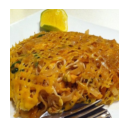

[GT]   class index: 54, class name: hot_and_sour_soup
[Pred] class index: 54, class name: hot_and_sour_soup


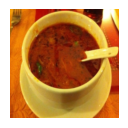

[GT]   class index: 28, class name: croque_madame
[Pred] class index: 28, class name: croque_madame


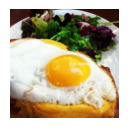

[GT]   class index: 13, class name: caprese_salad
[Pred] class index: 13, class name: caprese_salad


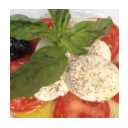

[GT]   class index: 100, class name: waffles
[Pred] class index: 100, class name: waffles


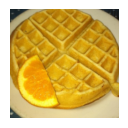

In [77]:
def visualize_model(model, folder, num_images=6):

    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders[folder]):

            #device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                print("==========================================================================")
                print("[GT]   class index: {}, class name: {}".format(labels[j], class_names[labels[j]]))
                print("[Pred] class index: {}, class name: {}".format(preds[j], class_names[preds[j]]))

                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                #ax.set_title('ground-truth: {}, predicted: {}'.format(class_names[labels[j]], class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

visualize_model(model, 'test')

# test

In [78]:
def estimateConfusionMatrix(model, nb_classes, folder, num_images=6):

    confusion_matrix = torch.zeros(nb_classes, nb_classes)
    with torch.no_grad():
        for i, (inputs, classes) in enumerate(dataloaders[folder]):
            inputs = inputs.to(device)
            classes = classes.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

    # 0: 'apple_pie', 1: 'baby_back_ribs', 2: 'baklava', 3: ... and so on
    #    pred 0 1 2 3 4
    # gt
    # 0
    # 1
    # 2
    # 3
    # 4
    confusion_matrix = confusion_matrix.numpy()

    return confusion_matrix

confusion_matrix_test = estimateConfusionMatrix(model, class_num, 'test')

print(confusion_matrix_test)

[[122.   0.  10. ...   1.   0.   6.]
 [  0. 157.   0. ...   1.   1.   0.]
 [ 12.   0. 196. ...   1.   2.   0.]
 ...
 [  1.   0.   2. ... 171.   0.   1.]
 [  0.   0.   0. ...   0. 172.   0.]
 [  2.   0.   0. ...   0.   0. 202.]]


In [79]:
def estimateOtherMetrics(confusion_matrix):

    # Accuracy
    accuracy = confusion_matrix.diagonal().sum()/confusion_matrix.sum()*100

    # Recall
    recall = confusion_matrix.diagonal()/confusion_matrix.sum(1)

    # Precision
    precision = confusion_matrix.diagonal()/confusion_matrix.sum(0)

    # F1 Score
    f1_score = 2 * precision * recall / (precision + recall)

    # Number of failure cases
    failure_num = int(confusion_matrix.sum() - confusion_matrix.diagonal().sum())

    return accuracy, recall*100, precision*100, f1_score, failure_num

accuracy_test, recall_test, precision_test, f1_score_test, failure_num_test = estimateOtherMetrics(confusion_matrix_test)

print('== Test Set ==')
print('Accuracy: {}'.format(accuracy_test))
print('Recall: {}'.format(recall_test))
print('Precision: {}'.format(precision_test))
print('F1 Score: {}'.format(f1_score_test))
print('Number of misclassification: {}'.format(failure_num_test))

== Test Set ==
Accuracy: 71.90890908241272
Recall: [48.8      62.800003 78.4      80.4      74.8      64.8      84.
 76.4      53.600002 54.4      56.       69.6      72.399994 68.8
 76.4      53.2      71.6      52.       60.399998 66.399994 75.6
 64.8      55.199997 80.8      78.799995 82.4      64.       87.6
 84.       72.799995 86.       66.399994 84.799995 98.4      82.8
 76.8      58.       56.800003 84.799995 45.2      82.       77.200005
 70.       73.6      77.600006 80.8      64.4      58.8      84.4
 61.199997 63.200005 83.200005 82.8      69.6      94.4      69.6
 56.4      67.2      60.8      55.199997 85.2      80.       70.
 89.200005 87.2      85.2      68.       42.       78.4      89.600006
 84.4      76.4      78.4      61.6      68.4      87.6      83.200005
 42.       81.6      74.8      62.       73.6      56.4      87.6
 62.4      56.800003 80.8      72.399994 89.200005 53.600002 85.6
 88.       67.6      50.       72.799995 83.200005 64.4      81.6
 68.4      6